In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#日本プロ野球の2019年の投手の防御率ランキング(規定投球回数が1/2以上の選手を出力)
npb= pd.read_csv('ML_data/投手成績2019.csv')
#上位50人を出力
npb.head(20)

,順位,選手名,チーム,防御率,試合,勝利,敗北,セーブ,ホールド,勝率,打者,投球回,被安打,被本塁打,与四球,与死球,奪三振,失点,自責点,DIPS
0,1,山本 由伸,オリックス,1.95,20,8,6,0,0,0.571,553,143.0,101,8,36,3,127,37,31,2.89
1,2,有原 航平,日本ハム,2.46,24,15,8,0,0,0.652,639,164.1,111,14,40,9,161,49,45,3.16
2,3,エスコバー,DeNA,2.51,74,5,4,0,33,0.556,306,75.1,60,7,24,2,88,23,21,2.95
3,4,大野 雄大,中日,2.58,25,9,8,0,0,0.529,696,177.2,132,18,43,2,156,52,51,3.41
4,5,ジョンソン,広島,2.59,27,11,8,0,0,0.579,650,156.2,132,12,58,4,132,50,45,3.58
5,6,榊原 翼,オリックス,2.72,13,3,4,0,0,0.429,333,79.1,64,5,37,5,59,29,24,4.04
6,7,フランスア,広島,2.76,67,8,6,12,18,0.571,308,71.2,55,8,32,7,94,29,22,3.37
7,8,千賀 滉大,ソフトバンク,2.79,26,13,8,0,0,0.619,752,180.1,134,19,75,8,227,60,56,3.34
8,9,ニール,西武,2.87,17,12,1,0,0,0.923,410,100.1,103,8,15,6,51,38,32,3.77
9,10,山口 俊,巨人,2.91,26,15,4,0,0,0.789,705,170.0,137,8,60,13,188,60,55,2.79


<h3>教師なし学習をおこない、データがどのクラスタに分類されているか確認する</h3>

In [44]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=4, random_state=1)
good_columns = npb._get_numeric_data().dropna(axis=1)
kmeans_model.fit(good_columns)
labels = kmeans_model.labels_
labels

array([3, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 3, 0, 3, 2, 2, 0, 2, 3, 2, 0,
       0, 2, 1, 1, 2, 0, 2, 1, 0, 3, 0, 0, 3, 3, 3, 2, 2, 0, 2, 0, 0, 3,
       0, 2, 2, 3, 0, 0, 3, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2])

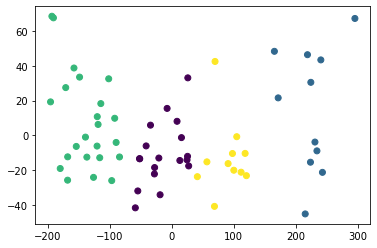

In [45]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

In [46]:
plot_columns

array([[  69.69552052,   42.52923204],
       [ 165.37761679,   48.36598222],
       [-193.33370018,   68.56342743],
       [ 224.12518848,   30.50843391],
       [ 171.48047271,   21.56041961],
       [-171.03374173,   27.47426082],
       [-190.83054665,   67.64169061],
       [ 295.17589899,   67.2894053 ],
       [ -89.77304597,   -4.10410763],
       [ 240.25233687,   43.42241063],
       [ 218.70462885,   46.42112634],
       [ 223.54053707,  -15.48409042],
       [ 104.69276411,   -0.80041932],
       [ -34.36111115,    5.85325819],
       [ 118.18572937,  -10.41368754],
       [-157.72698337,   38.75997688],
       [-101.7488834 ,   32.55034477],
       [  25.79973715,   33.09257764],
       [-118.8563162 ,    6.25929132],
       [  90.74782286,  -16.2826141 ],
       [-148.69688076,   33.51500692],
       [   8.43461587,    8.06609717],
       [  25.34935193,  -12.10520155],
       [-120.19357458,   10.7422187 ],
       [ 242.83983893,  -21.33105888],
       [ 233.9542438 ,   

In [57]:
Yamamoto = good_columns.loc[ npb['選手名'] == '山本　由伸',: ]
Yamamoto

,順位,防御率,試合,勝利,敗北,セーブ,ホールド,勝率,打者,投球回,被安打,被本塁打,与四球,与死球,奪三振,失点,自責点,DIPS
0,1,1.95,20,8,6,0,0,0.571,553,143.0,101,8,36,3,127,37,31,2.89


In [58]:
Arihara = good_columns.loc[ npb['選手名'] == '有原　航平',: ]
Arihara 

,順位,防御率,試合,勝利,敗北,セーブ,ホールド,勝率,打者,投球回,被安打,被本塁打,与四球,与死球,奪三振,失点,自責点,DIPS
1,2,2.46,24,15,8,0,0,0.652,639,164.1,111,14,40,9,161,49,45,3.16


In [60]:
Escobar = good_columns.loc[ npb['選手名'] == 'エスコバー',: ]
Escobar 

,順位,防御率,試合,勝利,敗北,セーブ,ホールド,勝率,打者,投球回,被安打,被本塁打,与四球,与死球,奪三振,失点,自責点,DIPS
2,3,2.51,74,5,4,0,33,0.556,306,75.1,60,7,24,2,88,23,21,2.95


In [62]:
#データフレーム型をリスト型に変更
Yamamoto_list = Yamamoto.values.tolist()
Arihara_list = Arihara.values.tolist()
Escobar_list  = Escobar.values.tolist()

#Pそれぞれの選手がどのクラスタに分類されるのか予測
Yamamoto_Cluster_Label = kmeans_model.predict(Yamamoto_list)
Arihara_Cluster_Label = kmeans_model.predict(Arihara_list)
Escobar_Cluster_Label = kmeans_model.predict(Escobar_list)

print(Yamamoto_Cluster_Label)
print(Arihara_Cluster_Label)
print(Escobar_Cluster_Label)

[3]
[1]
[2]


<h3>線形回帰モデルをつかいDIPSから防御率を予測する</h3>

In [50]:
npb.corr()

,順位,防御率,試合,勝利,敗北,セーブ,ホールド,勝率,打者,投球回,被安打,被本塁打,与四球,与死球,奪三振,失点,自責点,DIPS
順位,1.000000,0.969143,-0.271319,-0.527515,0.056186,-0.167715,-0.183187,-0.468382,-0.329568,-0.411830,-0.052411,0.123984,-0.115726,-0.140609,-0.451697,0.386583,0.369545,0.654822
防御率,0.969143,1.000000,-0.247009,-0.504712,0.054435,-0.158335,-0.170324,-0.451145,-0.332975,-0.418547,-0.063257,0.130918,-0.090936,-0.103451,-0.425303,0.382065,0.377453,0.651732
試合,-0.271319,-0.247009,1.000000,0.061191,-0.120425,0.407149,0.939873,0.182617,-0.147979,-0.127837,-0.217962,-0.209077,-0.073694,-0.029233,0.030768,-0.304949,-0.288483,-0.305801
勝利,-0.527515,-0.504712,0.061191,1.000000,0.120502,0.023524,-0.148436,0.732488,0.744604,0.770022,0.553520,0.277778,0.392860,0.400657,0.681418,0.314491,0.346915,-0.462783
敗北,0.056186,0.054435,-0.120425,0.120502,1.000000,-0.020606,-0.252986,-0.536938,0.460343,0.436586,0.465871,0.507533,0.235958,0.065112,0.358176,0.482100,0.496221,-0.028792
セーブ,-0.167715,-0.158335,0.407149,0.023524,-0.020606,1.000000,0.301708,0.047407,-0.205261,-0.196757,-0.261749,-0.169731,-0.077670,0.104608,-0.020540,-0.241464,-0.287210,-0.150286
ホールド,-0.183187,-0.170324,0.939873,-0.148436,-0.252986,0.301708,1.000000,0.084199,-0.376172,-0.350772,-0.414099,-0.381568,-0.201513,-0.103914,-0.159619,-0.466473,-0.455485,-0.234747
勝率,-0.468382,-0.451145,0.182617,0.732488,-0.536938,0.047407,0.084199,1.000000,0.307990,0.339509,0.170408,-0.076280,0.166997,0.233756,0.295709,-0.045616,-0.027226,-0.344635
打者,-0.329568,-0.332975,-0.147979,0.744604,0.460343,-0.205261,-0.376172,0.307990,1.000000,0.991081,0.894540,0.622518,0.483016,0.305564,0.818033,0.700693,0.726296,-0.383490
投球回,-0.411830,-0.418547,-0.127837,0.770022,0.436586,-0.196757,-0.350772,0.339509,0.991081,1.000000,0.854671,0.594089,0.432548,0.292125,0.828078,0.622513,0.657804,-0.440241


In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(npb[['DIPS']], npb[['防御率']], test_size=0.2, random_state=42)

In [52]:
#Create the Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # Create the model
lr.fit(x_train, y_train) #Train the model
predictions = lr.predict(x_test) #Make predictions on the test data
print("########## 予測値 ############")
print(predictions)
print("########## 実測値 ############")
print(y_test.values)

########## 予測値 ############
[[4.45037286]
 [4.63108331]
 [2.79816306]
 [4.43316235]
 [3.78776789]
 [3.63287322]
 [4.47618864]
 [4.03732041]
 [3.48658381]
 [3.98568886]
 [4.51060968]
 [2.71211047]
 [5.02692524]]
########## 実測値 ############
[[5.76]
 [4.67]
 [1.95]
 [4.32]
 [2.72]
 [4.01]
 [3.19]
 [2.96]
 [3.53]
 [4.86]
 [4.63]
 [2.91]
 [4.19]]


In [54]:
lr_confidence = lr.score(x_test, y_test)
print("決定係数 (R^2): ", lr_confidence)

from sklearn.metrics import mean_squared_error
print("平均二乗誤差 (MSE): ",mean_squared_error(y_test, predictions))

決定係数 (R^2):  0.3981440185123053
平均二乗誤差 (MSE):  0.6204800409006418
